In [164]:
import pandas as pd
overfitShort = pd.read_csv('../data/subjective_overfitShort.csv')

In [182]:
import numpy as np
overfitShort.head()
X = np.array(overfitShort['x'])[:, np.newaxis]
y = data['y']

# Problem 2.3.1
**Fit a linear regression model using least squares. How reasonable is the fit?**

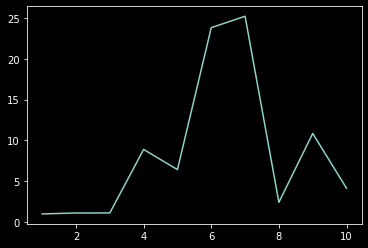

In [166]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
plt.plot(X, y)

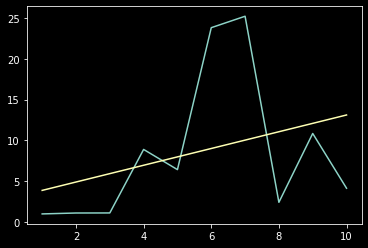

In [167]:
from sklearn.linear_model import LinearRegression

# Create and fit Linear Regression
m = LinearRegression()
m.fit(X, y)
preds = m.predict(X)
plt.plot(X, y)
plt.plot(X, preds)

# As we can see, the fit is essentially terrible.
# Problem 2.3.1

# Problem 2.3.2
**Fit a quintic (powers up to the fifth) model to the data. How does its fit compare to that of the lienar model?**

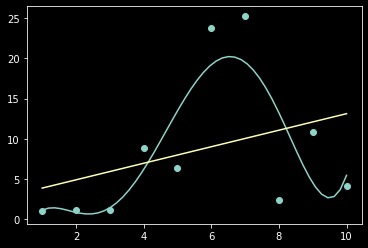

In [205]:
polyfit = np.polyfit(X.flatten(), y, deg=5)
plt.scatter(X,y)

space = np.linspace(min(X), max(X))
preds = np.polyval(polyfit, space)
plt.plot(space, preds)
plt.plot(X, m.predict(X))
    
# The fit is better. I think.

In [209]:
# Evaluate quality of the two fits with MSE.
from sklearn.metrics import mean_squared_error as MSE

print('RMSE of LinearRegresssion:', MSE(y, m.predict(X), squared=False))
print('RMSE of quintic:', MSE(y, np.polyval(polyfit, X), squared=False))

# As we can see, the quintic outperforms the LR.

RMSE of LinearRegresssion: 8.111564167966815
RMSE of quintic: 5.189967394808179


# Problem 2.3.3
**You are now given new data contained within subjective_overfitLong.csv. This contains data on 1000 replications of the same experiment, where the x values are held fixed. Using th least squares fits from the first part of this question, compare the performance of the linear regression model with that of the quintic model.**

In [177]:
overfitLong = pd.read_csv('../data/subjective_overfitLong.csv')
print(overfitLong.shape)

overfitLong_X = []
overfitLong_y = []
for col in overfitLong.columns:
    for yval in overfitLong[col]:
        overfitLong_X.append(col)
        overfitLong_y.append(yval)
        
X_ofLong = np.array(overfitLong_X).astype(float)
y_ofLong = np.array(overfitLong_y)

(99, 10)


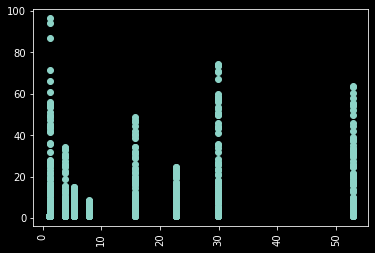

In [178]:
plt.xticks(rotation=90)
plt.scatter(X_ofLong, y_ofLong)

In [204]:
print('RMSE of LR on overfitLong data:',
      MSE(m.predict(X_ofLong[:,np.newaxis]),
      y_ofLong, squared=False))
print('RMSE of quintic on overfitLong data:',
      MSE(np.polyval(polyfit, X_ofLong),
      y_ofLong, squared=False))

rmses_LR = []
rmses_quintic = []
for col in overfitLong.columns:
    curr_X = np.repeat(float(col), len(overfitLong[col]))[:, np.newaxis]
    rmses_LR.append(MSE(m.predict(curr_X), overfitLong[col], squared=False))
    rmses_quintic.append(MSE(np.polyval(polyfit, curr_X), overfitLong[col], squared=False))
    
print(np.array(rmses_LR).mean())
print(np.array(rmses_quintic).mean())
    

RMSE of LR on overfitLong data: 19.855457419670202
RMSE of quintic on overfitLong data: 1699763.18664661
15.568148717888155
560523.4488500601
